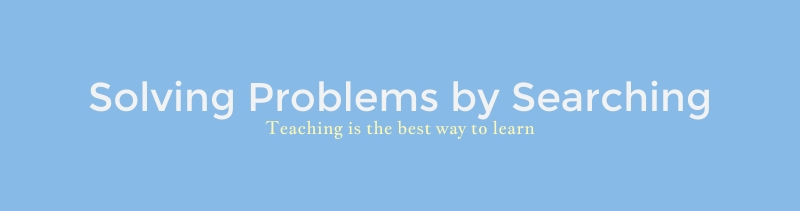








<h2 style="color:white;font-style:italic;background-color:#88bae8;" > 1.Introduction</h2><br><br>

 
 This tutorial is an AI project that concerns with the needing of supporting materials regarding to the few resources for the computer students.as you see in the title we will use search! so, what is search in AI? is the process of explore something and retrieve  a solution if exists.
 
 we are focusing on Informed search technique, its main concepts and two of its popular algorithms. Search problems  is our main concern in this lesson. We formulate an analogy  to suit the search space.The following  image summarize  what you going to learn .

 
 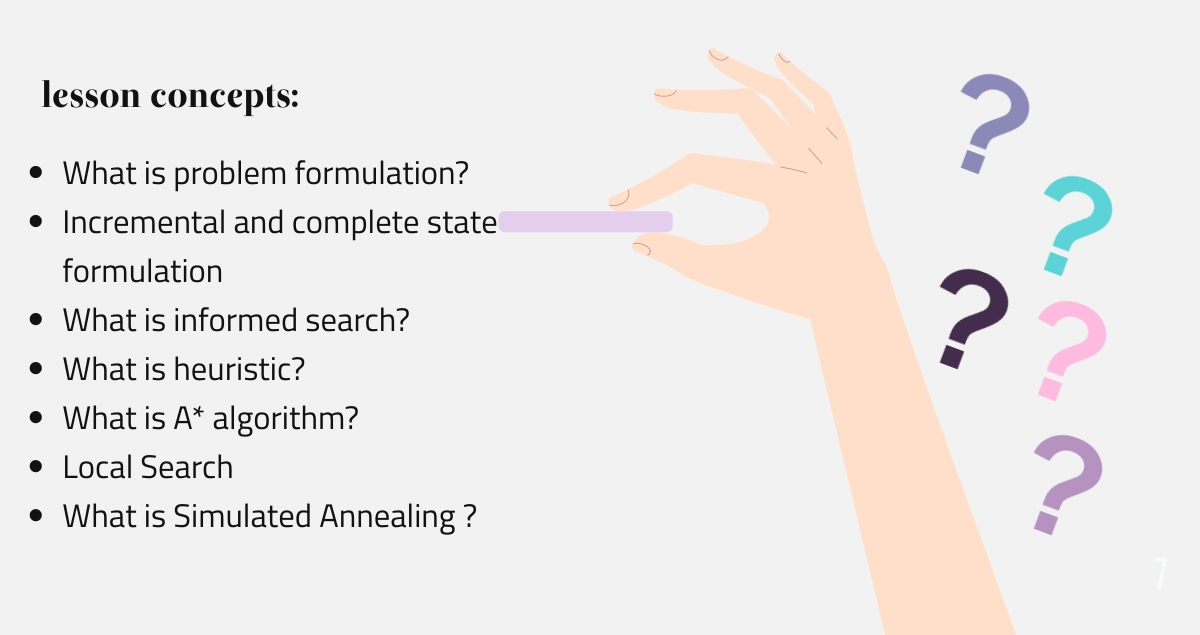
 
  
  ### 1.1 Search technique
   The search space in AI divided into two technique, 1-Uninformed(Blind)search,2-Informed(Heuristic) search.The following image represent the difference between the two technique.
   
   
  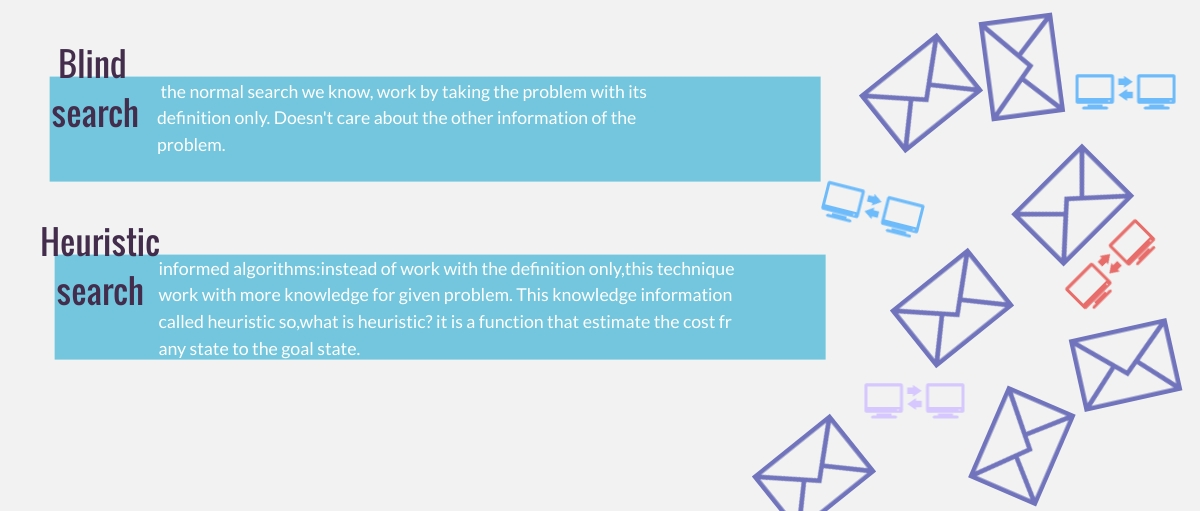

  
  ### 1.2 Heuristic function
 Heuristic is an estimated value from a specific state to the goal state,in our problem, the heuristic represent the time it take to send a message from any state to the goal state while the path(link)is congested.

### 1.3 Incremental and Complete state formulation
There is two types of problem formulation:Incremental Formulation and Complete State Formulation.So, what are they?
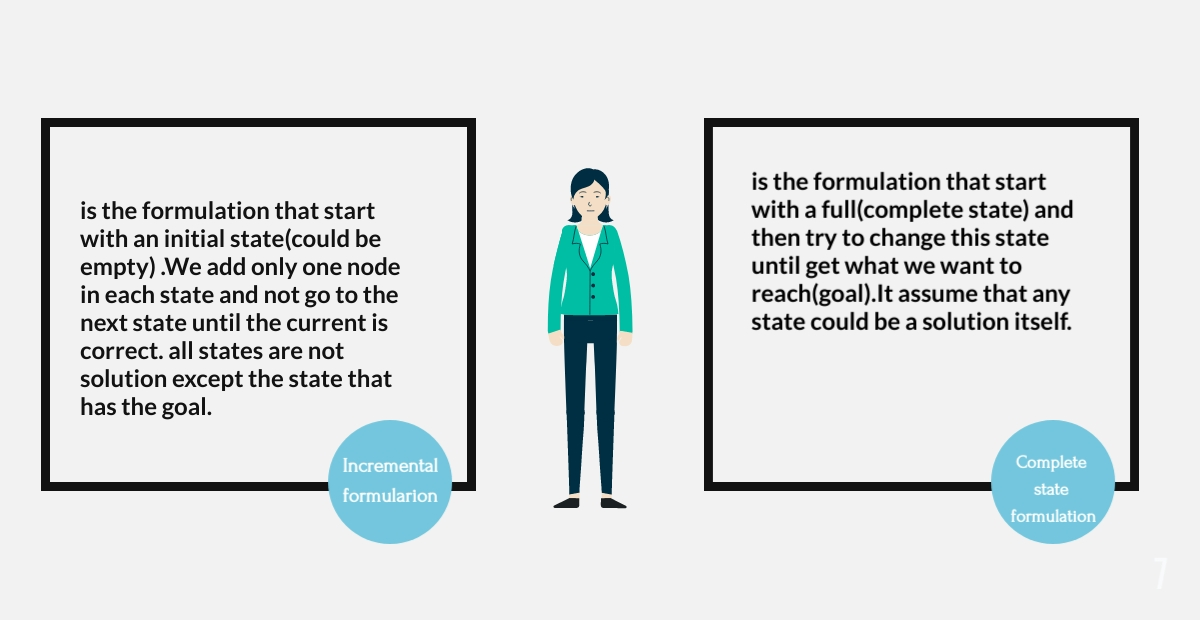

<h2 style="color:white;font-style:italic;background-color:#88bae8"> 2.problem(Computer Network)</h2><br><br>

An electronic message travel through the network from a device that send it to specific destination.As we all know, the network  has hundred of thousands devices connected together so,the message may stuck on a congested link that gives a possibility of loss this message or it take a long time to arrive. We need to take care of this issue. 
Our main idea is to simulate the work of Routing Algorithm which is(an algorithm that determine the best path to a message).
The problem:
device (S) wish to send an emergence message to device(G), there is no direct link between the two device. We need to determine the best path to make (G) receive the emergence message quickly.We will implement  two algoirthm to determine  the best path for the message.


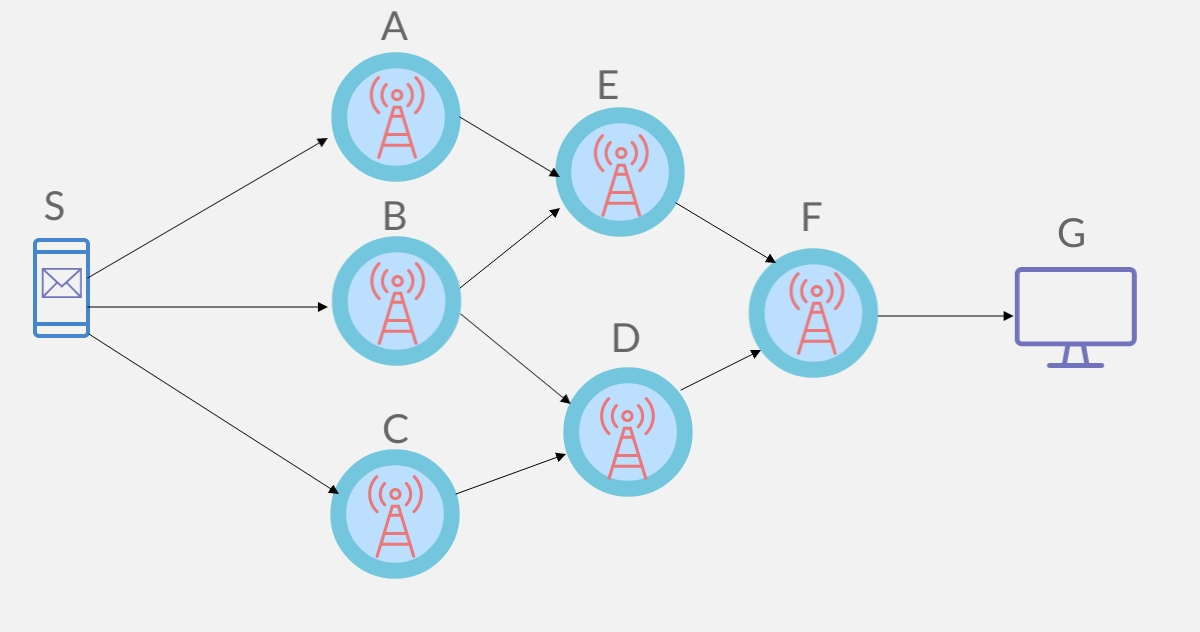
              
####  2.1 problem formulation
What is formulation? "It is the process of determining the constituent parts of a problem: its important factors and variables, and the interrelationships between them"[2], like initial state, goal state, actions and transaction model.We formulate the problem using incremental formulation. You will see these in the  following subsections.

  #### 2.1.1 initial state
  The first state of a problem, [S] is the initial state of the message.
  
  
  #### 2.1.2 actions 
  Go from current state to any of its adjacent state.for example state[S] can choose to go to [A,B,C] states.
  
  #### 2.1.3 transaction model
   Or successor is a function that generates a next state from the current state.As we will see that each algorithm has different mechanism to choose the next state,A* choose the minimum congested state while Simulated Annealing choose a random state.
  
  #### 2.1.4 state space
  We mean by state space every device on the network. for our example S,A,B,E,D,F,G.
  
  #### 2.1.5 goal state
  Is the state we want to reach.in our example the message arrive to device [G]
 
 #### 2.1.6 the new representation
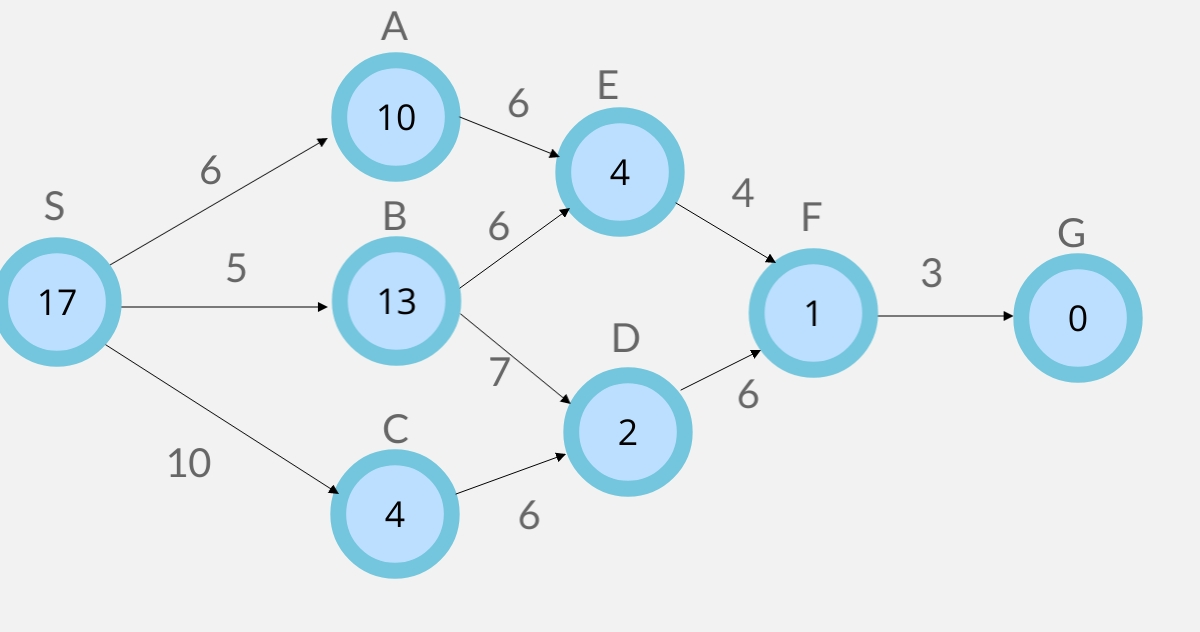
 
 
 Each number on a link represents the time needed to arrive to state n. while each number inside a circle represents the heuristic value(in our problem heuristic main the time it take a message to arrive to the destination if the path is congested).
 
  #### 2.1.6 problem implementation
  After the formulation , we can implement the problem as a simple code.


  

In [ ]:

class Node():# To represent devices
    def __init__(self, name, h):
        self.name = name
        self.h = h
        self.chil = []
        self.parent = []
        self.cost = 0

    
    
    #return a specific adjecent device
    
    def retchild(self,i):
        return self.chil[i]
    
    def retname(self):
        return str(self.name)

    def addchid(self, child):#add adjacent
        self.chil.append(child)


    def retchil(self):#return all adjacent
        return self.chil

    def efun(self):#the evaluation function
        return 0 + self.h
    
    def leng(self):#return the number of adjacent devices
        return len(self.chil)


class child():  #each device will have an array of child which are all adjacent devices 
    
    
    def __init__(self, name, parent, cost, h):#constructor
        self.name = name
        self.cost = cost
        self.h = h

    def retname(self):
        return self.name.retname()

    def efun(self):
        return self.cost + self.h
    
    def retchild(self,i):#return specific adjacent
        return self.name.chil[i]
    
    def retchil(self):#return all adjacent
        return self.name.retchil()

    def retParent(self):#return the previuos device the message visit
        return self.name.retParent()
    
    def leng(self):#the number of adjacent
        return len(self.name.chil)
    
    
#This class is used to retrieve the path of visited devices 
class relation():
    def __init__(self, name, parent, cost):
        self.name = name
        self.cost = cost
        self.parent = parent

    def efunction(self):
        return self.name.h + self.cost

    def retchil(self):
        return self.name.retchil()

    def retname(self):
        return self.name.retname()


# create object of each device    
S = Node('S', 17)
A = Node('A', 10)
B = Node('B', 13)
C = Node('C', 4)
E = Node('E', 4)
G = Node('G', 0)
F = Node('F', 1)
D = Node('D', 2)

#add S adjacents
S.addchid(child(A,S, 6,10))
S.addchid(child(B,S, 5,13))
S.addchid(child(C, S,10,4))

#add A adjacent
A.addchid(child(E,A,6,4))


#add B adjacent
B.addchid(child(E,B,6,4))
B.addchid(child(D,B,7,2))

#add C adjacent
C.addchid(child(D, C,6,2))

#add D adjacent
D.addchid(child(F, D,6,1))


#add E adjacent
E.addchid(child(F, E,4,1))

# add F adjacent
F.addchid(child(G, F,3,0))

#detrmine the start state 
source = S

#determine the goal state
destination = G




  
 <h2 style="color:white;font-style:italic;background-color:#88bae8"> 3.A* algorithm</h2><br><br>
  
  ### 3.1 what is A*?
  
  Is an informed search algorithm. which is mean it uses heuristic with the definition to find path.It is also a type pf search in form of Best-First search, it uses a special formula to pick up the best state, this formula known as Evaluation Function( f(n). so, how to calculate f(n)? just a simple equation represents in the next line:
                 
$$ f(n)=g(n)+h(n) $$

The main concern is to reduce the total cost as possible  by picking the state with minimum f(n).




  <h3 >3.1.1.Algorithm explanation</h2><br><br>

  #### A* algorithm goes as follow:
   1. take problem.
   2. put the source node on the fringe( a list that hold the nodes).
   3. extract the source and put it in expand list and add its successors in fringe.
   4. extract the node with minimum f(n) and put it in expand list.
     + if the extracted node is the goal? stop the algorithm. 
     + else go to step 5.
   5. add the successors of the extracted node to the fringe.
   6. repeat 4,5.
   
   The expanded list will not always contain the nodes of the path , it may have other nodes not related to the path so,
   we used backtrack function to find the path with no extra node:
   
   
   1. reverse expand list.
   
   2. add the first node on expand  to path list.
   
   3. loop from i=0 to expand length .
   
   4. check : if expand[i+1] is parent of expand[i]:
          +  add the expand[i+1] to path.
          +  else skip .
          
   5. return path with its cost  
   
   




<h3> 3.1.2 A* implementation </h3>

In [ ]:

def sortfring(fringe):  # bubble sort to sort the fringe in decreasing order [3]
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(fringe) - 1):
            if fringe[i].efunction() > fringe[i + 1].efunction():
                fringe[i], fringe[i + 1] = fringe[i + 1], fringe[i]
                swapped = True
                
                

def pathAstr(expand):#backtracking to find the path
    expand.reverse()
    pathA = []
    pathA.append(expand[0])
    flage=True
    while flage:
        if len(expand)<=1:
            break
        current=expand[0].parent
        if current.retname()== expand[1].retname():
            pathA.append(current)
            expand.pop(0)
        else:
            expand.pop(1)
    pathA.reverse()  
    costA=0
    for i in pathA:
        costA+=i.cost
        print(i.retname())
    print(costA)



def AStar(source,destination):
    expand = []# initialize axpand list
    fringe=[]# intialize fringe list
    fringe.append(source)# add the source node fringe
    flage = True
    while flage:
        node = fringe.pop(0)
        expand.append(node)
        if node.retname() == destination.retname():
            flage = False
            break
        for i in node.retchil():
            fringe.append(relation(i, node, i.cost))
        sortfring(fringe)
    pathAstr(expand)#to find the correct path

AStar(source,destination) #call A star  

S
C
D
F
G
25


A* return good result but has high time complexity that is O(n³bd) 
<h4> Here is the problem and we will represent the expand list on each step</h4>

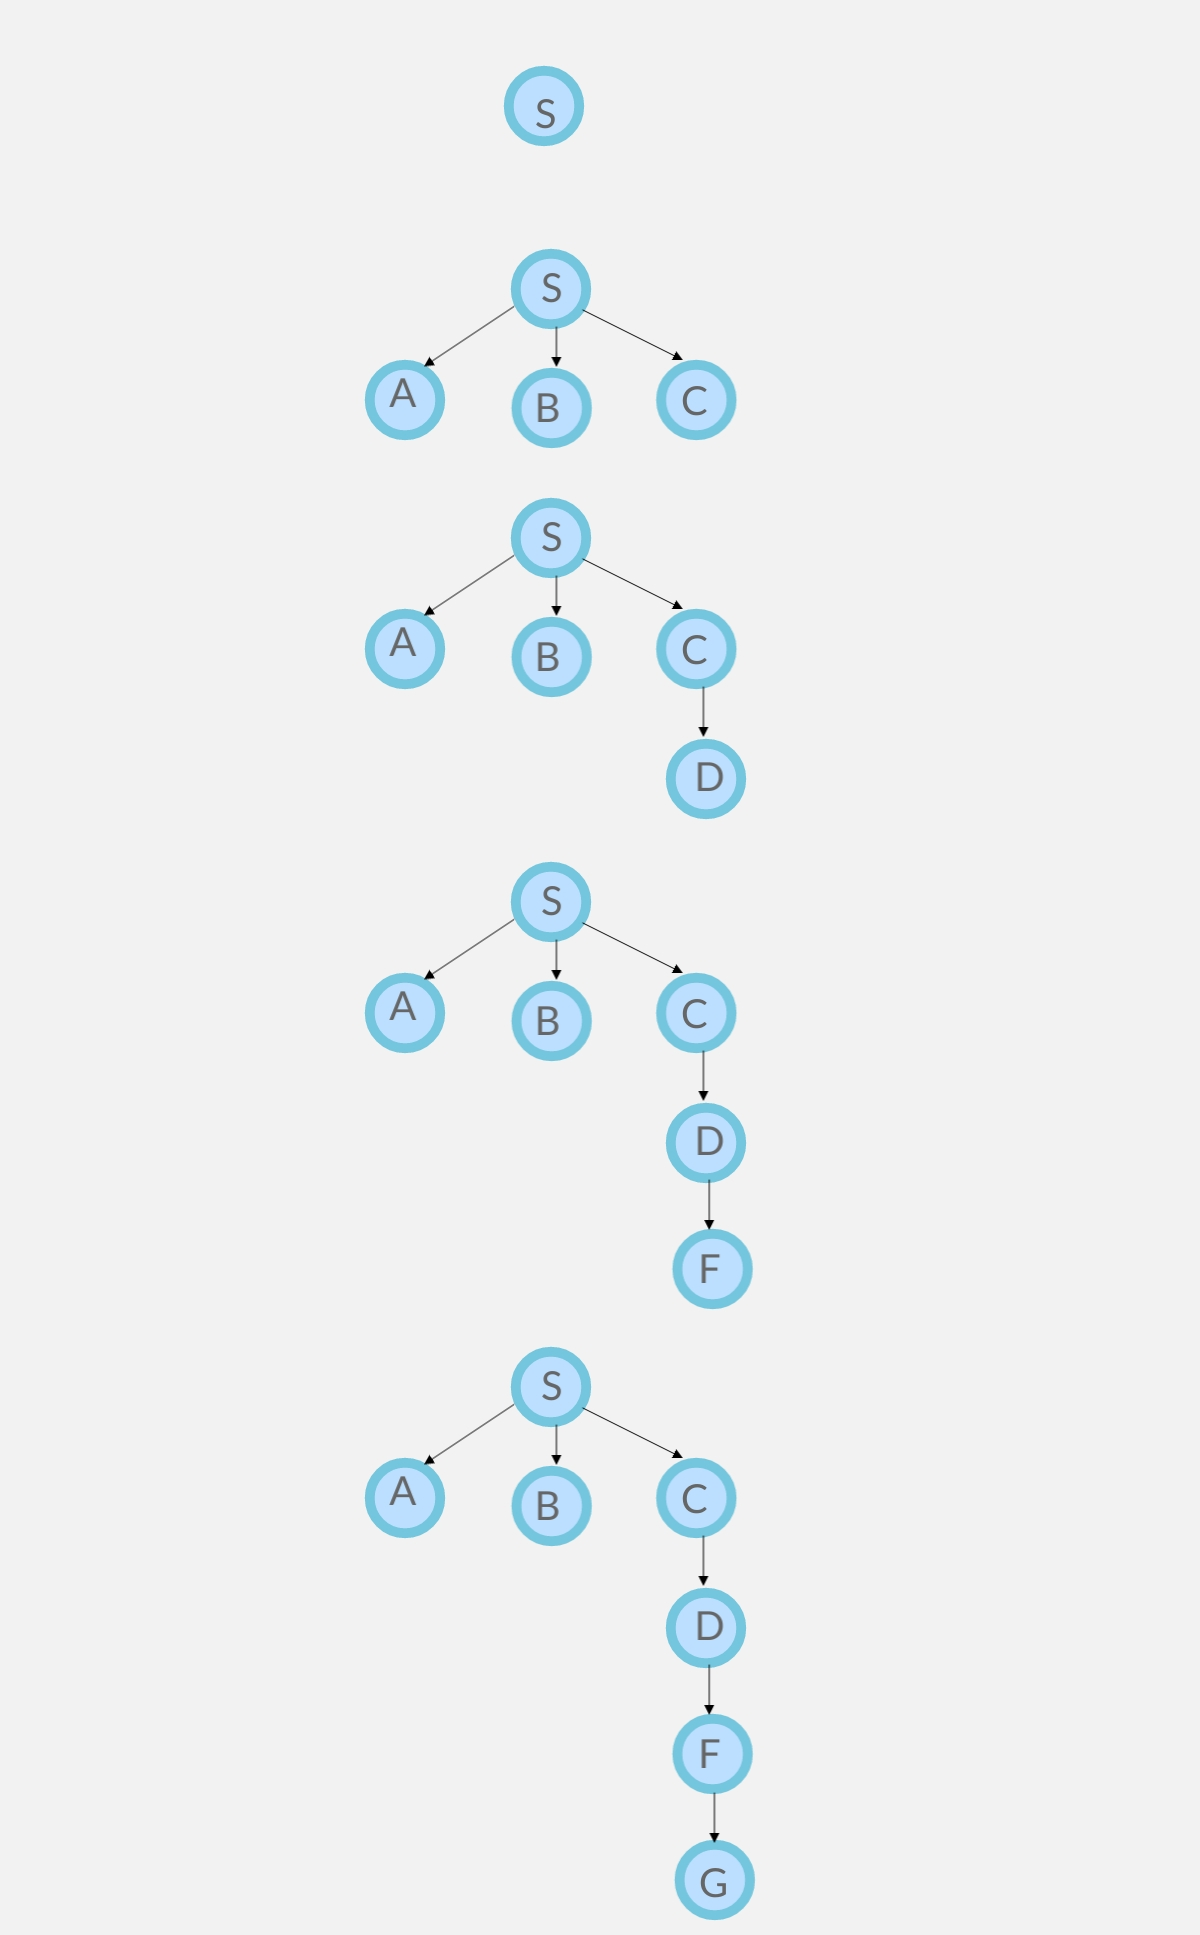


The next image represents the final path the message take to arrive to G
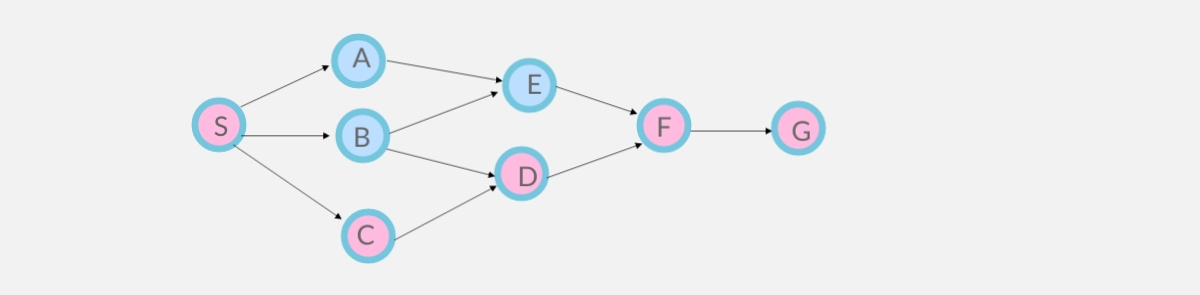

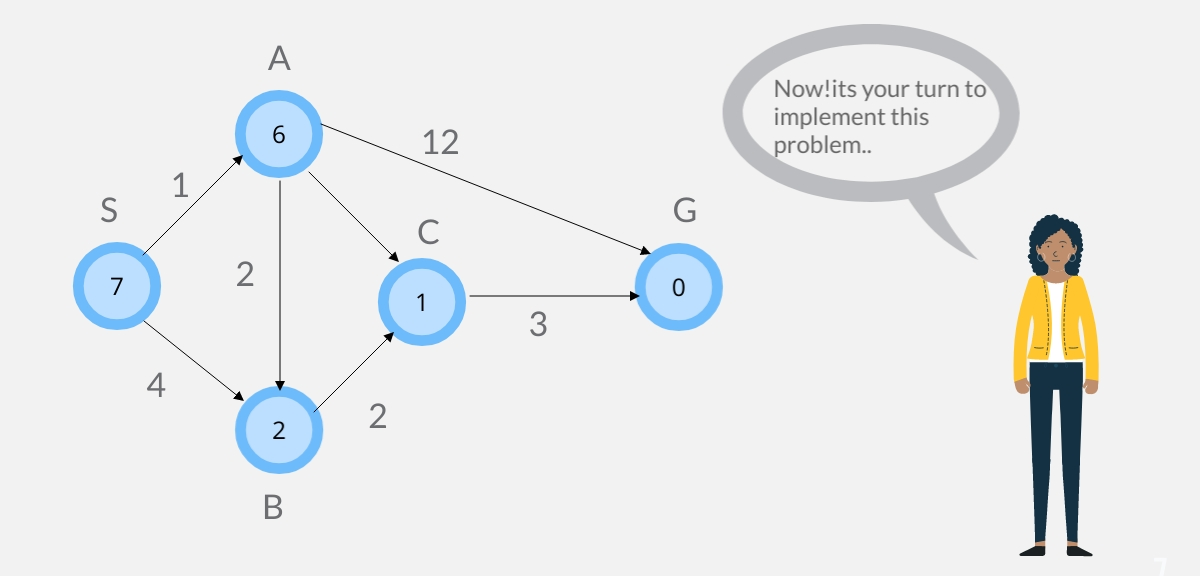

In [ ]:
#represent each node by (name of node)= Node('name',heuristic) like S = Node('S', 17)

#add aech node adjacent by nameofparent.addchid(chldi(nameofchild,nameofparent,cost,heuristic))
#like S.addchid(child(A,S, 6,10))

##detrmine the start state like source=S 

##detrmine the goal state like destination = G

#call AStar method


 <h2 style="color:white;font-style:italic;background-color:#88bae8" >4.Local Search </h2><br><br>

<h3>4.1 what is local search?</h3>

In the previous section, we cover A* , the algorithm work efficiently with a finite space but, some problems have a huge space, A* will take long time to return the solution. In this section, we represent a technique in informed search called Local search,This technique has many algorithms, usually used with huge problems that not care about the steps to get the solution , just care to determine if there is a solution or not.

 <h3  > 4.2 Simulated Annealing (SA)</h3><br><br>

SA is a local search that its idea came  from the analogy of taking a heated metal and  then cool it slowly.
It is works by taking a random state and decide : if its good accept it , if its not good take it with some probability less than 1.

The algorithm goes as follow:

1. take problem and the max value of T(Temperature).
2. start with initial state as current.
3. loop from zero to infinity.
4. if  T reach to zero return current solution .
5. else : generate a random successor of current and name it next.
6. calculate the difference between the current and next.
7. if difference >0 then accept next.
8. else take the next with probability(specific formula) must grater than a random probability .
9. update the value of T by a formula(no specific one) .
10. repeat from 3.

<h3> 4.2.1 implementation of SA</h3>



In [ ]:
#SA
import math
import random as random

def pathSA(pathS):#print the path
    costS=0
    for i in pathS:
        costS+=i.cost
        print(i.retname())
    print(costS)
def nextT(T0,k):# evaluate this formula to compute T T_(k+1)= T_0/log⁡(k+1)[4]
    return T0/math.log(k+1,2)#K is the index 

def simulatedAnnealing(current,T0,destination): 
    pathS=[]#initilaize the path
    pathS.append(source)#add sorce node to path
    T=T0
    for i in range(1,1000000):
        if T==0 and current.retname()==destination.retname():
            break
        if current.leng()!=0:#have child
            next=current.retchild(random.randint(0,current.leng()-1))#choose random adjacent 
            delE=next.h-current.h
            if delE>0:
                pathS.append(next)
                current=next
            else:#e=2.71828
                if math.pow(2.71828,delE/T)> random.randint(0, 1):
                    pathS.append(next)
                    current=next
        T=nextT(T,i)#update T
    pathSA(pathS)#calling to print path and cost

simulatedAnnealing(source,10,destination)

S
C
D
F
G
25


The time complexity of SA is O(((T-1)/log(k+1))*n) n is time complexity of method path.The time complexity is totally  dependent on the temperature  equation.
<h3> 4.2.2 Applying the problem on SA</h3>
We apply the same problem on SA to compare the result with A* result,the following images represents an output of SA:
<img src="img/SAP.jpg">

This image  not represent  the only output of SA.if you run the program many times, you may see different results like:SAEFG,SBDFG etc..why ?because  SA generate a random successor, it is impossible to have the same result 
for each run .


<h2 style="color:white;font-style:italic;background-color:#88bae8;" > 5.conclusion</h2><br><br>
In this tutorial, we simulate the routing algorithm using two informed algorithm. Now lets compare the performance of A* and SA.The follwing images represent the average cpu time of different proplems.

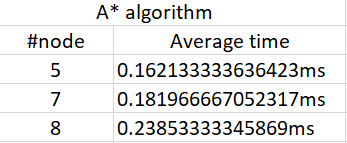

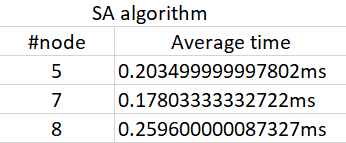

Note: why some average of SA greater than A* average? because the SA each run take different solution so,we take average some runs.
We conclued that A* will always give the same solution for single problem, while SA give different solutions for a single problem.
If we consider device S wish to send multiple messgases, A* guaranteed  the messges will arraive to destination in order while SA has no guarantee of the order.
We wish you enjoy in the toturial.

<h2 style="color:white;font-style:italic;background-color:#88bae8;" > 6.Refrences</h2><br><br>
[1] S.Russell and P.Norvig,'Artificial Intelligence A Modern Approach',3rd edition,Prentice Hall, 2009.

[2] IGIGlobal publisher of Timely knowledge, 'What is Problem Formulation',[Online],Available:https://www.igi-global.com/dictionary/dss-multiple-perspectives-complex-problems/23504 . [Accessed: 18- March- 2020]

[3] Stack Abuse, 'Sorting Algorithms in Python',2019. [Online]. Available: https://stackabuse.com/sorting-algorithms-in-python/ . [Accessed: 12- March- 2020].

[4] ReseaechGate,'How can I determine temperature parameters accurately for simulated annealing?',2015. [Online]. Available:https://www.researchgate.net/post/how_can_I_determine_temperature_parameters_accurately_for_simulated_annealing .[Accessed: 17- March- 2020]